In [1]:
import os
import sys
import cv2
import torch
import random
import warnings
import torchvision
import numpy as np
import pandas as pd
import torch.nn as nn
import seaborn as sns
# import pydicom as pdcm
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from sklearn.model_selection import KFold
import random
import copy
import nibabel as nib 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
import torch
from torch import nn
from models.cnn import cnn3d
from models import (cnn, C3DNet, resnet, ResNetV2, ResNeXt, ResNeXtV2, WideResNet, PreActResNet,
        EfficientNet, DenseNet, ShuffleNet, ShuffleNetV2, SqueezeNet, MobileNet, MobileNetV2)

# from opts import parse_opts



def main(cnn_name, model_depth, n_classes, in_channels, sample_size):
 
    # simple CNN 
    if cnn_name == 'cnn':
        """
        3D simple cnn model
        """
        print(cnn_name)
        model = cnn3d()
    
    # C3D
    elif cnn_name == 'C3D':
        """
        "Learning spatiotemporal features with 3d convolutional networks." 
        """
        model = C3DNet.get_model(
            sample_size=sample_size,
            sample_duration=16,
            num_classes=n_classes,
            in_channels=1)

    # ResNet
    elif cnn_name == 'resnet':
        """
        3D resnet
        model_depth = [10, 18, 34, 50, 101, 152, 200]
        """
        model = resnet.generate_model(
            model_depth=model_depth,
            n_classes=n_classes,
            n_input_channels=in_channels,
            shortcut_type='B',
            conv1_t_size=7,
            conv1_t_stride=1,
            no_max_pool=False,
            widen_factor=1.0)
    
    # ResNetV2
    elif cnn_name == 'ResNetV2':
        """
        3D resnet
        model_depth = [10, 18, 34, 50, 101, 152, 200]
        """
        model = ResNetV2.generate_model(
            model_depth=model_depth,
            n_classes=n_classes,
            n_input_channels=in_channels,
            shortcut_type='B',
            conv1_t_size=7,
            conv1_t_stride=1,
            no_max_pool=False,
            widen_factor=1.0)

    # ResNeXtV2
    elif cnn_name == 'ResNeXt':
        """
        WideResNet
        model_depth = [50, 101, 152, 200]
        """
        model = ResNeXt.generate_model(
            model_depth=model_depth,
            n_classes=n_classes,
            in_channels=in_channels,
            sample_size=sample_size,
            sample_duration=16)
    
    # ResNeXtV2
    elif cnn_name == 'ResNeXtV2':
        """
        WideResNet
        model_depth = [50, 101, 152, 200]
        """
        model = ResNeXtV2.generate_model(
            model_depth=model_depth,
            n_classes=n_classes,
            n_input_channels=in_channels)

    # PreActResNet
    elif cnn_name == 'PreActResNet':
        """
        WideResNet
        model_depth = [50, 101, 152, 200]
        """
        model = PreActResNet.generate_model(
            model_depth=model_depth,
            n_classes=n_classes,
            n_input_channels=in_channels)

    # WideResNet
    elif cnn_name == 'WideResNet':
        """
        WideResNet
        model_depth = [50, 101, 152, 200]
        """
        model = WideResNet.generate_model(
            model_depth=model_depth,
            n_classes=n_classes,
            n_input_channels=in_channels)

    # DenseNet
    elif cnn_name == 'DenseNet':
        """
        3D resnet
        model_depth = [121, 169, 201]
        """
        model = DenseNet.generate_model(
            model_depth=model_depth,
            num_classes=n_classes,
            n_input_channels=in_channels)

    # SqueezeNet
    elif cnn_name == 'SqueezeNet':
        """
        SqueezeNet
        "SqueezeNet: AlexNet-level accuracy with 50x fewer parameters and 
        <0.5MB model size"
        """
        model = SqueezeNet.get_model(
            version=1.0,
            sample_size=sample_size,
            sample_duration=16,
            num_classes=n_classes,
            in_channels=in_channels)
   
    # ShuffleNetV2
    elif cnn_name == 'ShuffleNetV2':
        """
        ShuffleNetV2
        "ShuffleNet V2: Practical Guidelines for Efficient CNN Architecture Design"
        """
        model = ShuffleNetV2.get_model(
            sample_size=sample_size,
            num_classes=n_classes,
            width_mult=1.,
            in_channels=in_channels)

    # ShuffleNet
    elif cnn_name == 'ShuffleNet':
        """
        ShuffleNet
        """
        model = ShuffleNet.get_model(
            groups=3,
            num_classes=n_classes,
            in_channels=in_channels)

    # MobileNet
    elif cnn_name == 'MobileNet':
        """
        MobileNet
        "MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications" 
        """
        model = MobileNet.get_model(
            sample_size=sample_size,
            num_classes=n_classes,
            in_channels=in_channels)

    # MobileNetV2
    elif cnn_name == 'MobileNetV2':
        """
        MobileNet
        "MobileNetV2: Inverted Residuals and Linear Bottlenecks"
        """
        model = MobileNetV2.get_model(
            sample_size=sample_size,
            num_classes=n_classes,
            in_channels=in_channels)
    
    # EfficientNet
    elif cnn_name == 'EfficientNet':
        """
        EfficientNet
        """
        model = EfficientNet3D.from_name(
            'efficientnet-b4', 
            override_params={'num_classes': n_classes}, 
            in_channels=in_channels)
    

    return model



# model = main(cnn_name = 'ResNet',
#              model_depth = 101, 
#              n_classes = 2,
#              in_channels=160,
#              sample_size = 192)

model = resnet.generate_model(
            model_depth = 101,
            n_classes = 2,
            n_input_channels = 160,
            shortcut_type = 'B',
            conv1_t_size = 7,
            conv1_t_stride = 1,
            no_max_pool = False,
            widen_factor = 1.0)



In [3]:
all_list = []
for root, dirs, files in os.walk('./AD/'):
    for file in files:
        file_path = os.path.join(root, file)
        all_list.append(file_path)

for root, dirs, files in os.walk('./CN/'):
    for file in files:
        file_path = os.path.join(root, file)
        all_list.append(file_path)
all_list = list(filter(lambda x: '.DS_Store' not in x, all_list))
# all_list.remove('./CN/011_S_0016/ADNI_011_S_0016_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20061206170814835_S13160_I31928.nii')
# all_list.remove('./CN/013_S_0502/ADNI_013_S_0502_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070926112008188_S27531_I75291.nii')

In [4]:
means, stdevs = [], []
all_data = np.zeros((100, 192, 192, 160))
for idx, val in enumerate(all_list):
    img = nib.load(val) #读取nii
    img_fdata = img.get_fdata()
    if img_fdata.shape[2] > 160:
        img_fdata = img_fdata[:, :, 4:164]
    img_fdata = cv2.resize(img_fdata, (192, 192))
    all_data[idx] = img_fdata

means = np.mean(all_data, axis = (0, 1, 2))
stds = np.std(all_data, axis = (0, 1, 2))

In [5]:
class MRIdata(Dataset):
    def __init__(self, path_list, transform = None):
        self.path_list = path_list
        self.transform = transform


    def __len__(self):
        return len(self.path_list)
    
    def __getitem__(self, index):
        
        img = nib.load(self.path_list[index]) #读取nii
        img_fdata = img.get_fdata()
        if img_fdata.shape[2] > 160:
            img_fdata = img_fdata[:, :, 4:164]
        img_fdata = cv2.resize(img_fdata, (192, 192))
        
#         print(img_fdata.shape, type(img_fdata))

#         inp_data = read_dicom_img(self.train_dir, str(self.data['BraTS21ID'][index]))
        inp_data = self.transform(img_fdata[:])
        if self.path_list[index].split('/')[1] == 'AD':
            label = torch.tensor([0, 1], dtype = torch.float)
        else:
            label = torch.tensor([1, 0], dtype = torch.float)
        
#         print(self.path_list[index].split('/')[1])
        return inp_data.float().unsqueeze(1), label

In [6]:
transforms = T.Compose([T.ToTensor(), T.Normalize(means, stds)])


random.shuffle(all_list)

train_dataset = MRIdata(all_list[:80], transform = transforms)
train_loader = DataLoader(train_dataset, shuffle = True, batch_size = 16)

test_dataset = MRIdata(all_list[80:], transform = transforms)
test_loader = DataLoader(test_dataset, shuffle = False, batch_size = 32)

In [7]:
# for indx, (data, label) in enumerate(train_loader, 0):
#     inputs, labels = data.to(device), label.to(device)
#     break

In [8]:
# net = MRINet().to(device)
net = model.to(device)
LRate = 0.001
# criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

optimizer = optim.Adam(net.parameters(), lr = LRate)
EPOCHS = 100
best_acc = 0


best_model = copy.deepcopy(net)  # Will work
    
for epoch in range(EPOCHS):
    total_loss = 0.0
    count = 0
    net.train()
    for indx, (data, label) in enumerate(train_loader, 0):
        inputs, labels = data.to(device), label.to(device)
        
        optimizer.zero_grad()
        outputs = net(inputs)#.squeeze(1)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        
        total_loss += loss.detach().item()
        optimizer.step()
        
        count += 1
    
    print(f"Epoch:{epoch}/{EPOCHS} - train Loss:{total_loss/count}")
    
    net.eval()
    total_loss = 0.0
    count = 0
    correct = 0
    total = 0
    
    for indx, (data, label) in enumerate(test_loader, 0):
        with torch.no_grad():
            inputs, labels = data.to(device), label.to(device)

            outputs = net(inputs)

            loss = criterion(outputs, labels)
            total_loss += loss.detach().item()
            
            _, predicted = torch.max(outputs, 1)
            _, labelss = torch.max(labels, 1)
            total += labels.size(0)
            correct += (predicted == labelss).sum().item()
            
            count += 1
    print(f"Epoch:{epoch}/{EPOCHS} - test Loss:{total_loss/count}")

    print(f'Accuracy of the network on the 20 test images: {100 * correct / total} %')
    
    if best_acc < correct / total:
        print('acc {} -> {} improve saving ....'.format(best_acc, correct / total))
        best_model = copy.deepcopy(net)  
        
        best_acc = correct / total
    print('-----------------------')

print("Training Complete")    
torch.save(best_model, './best_model.pt')

Epoch:0/100 - train Loss:1.5010597586631775
Epoch:0/100 - test Loss:136.05340576171875
Accuracy of the network on the 20 test images: 30.0 %
acc 0 -> 0.3 improve saving ....
-----------------------
Epoch:1/100 - train Loss:1.3073120594024659
Epoch:1/100 - test Loss:7.36419677734375
Accuracy of the network on the 20 test images: 55.0 %
acc 0.3 -> 0.55 improve saving ....
-----------------------
Epoch:2/100 - train Loss:0.6659868478775024
Epoch:2/100 - test Loss:0.5776402950286865
Accuracy of the network on the 20 test images: 70.0 %
acc 0.55 -> 0.7 improve saving ....
-----------------------
Epoch:3/100 - train Loss:0.6689664959907532
Epoch:3/100 - test Loss:0.7379224300384521
Accuracy of the network on the 20 test images: 60.0 %
-----------------------
Epoch:4/100 - train Loss:0.6056514382362366
Epoch:4/100 - test Loss:0.6424021124839783
Accuracy of the network on the 20 test images: 55.0 %
-----------------------
Epoch:5/100 - train Loss:0.6278713464736938
Epoch:5/100 - test Loss:0.77

Epoch:49/100 - train Loss:0.5011953115463257
Epoch:49/100 - test Loss:0.9151954054832458
Accuracy of the network on the 20 test images: 70.0 %
-----------------------
Epoch:50/100 - train Loss:0.20705758035182953
Epoch:50/100 - test Loss:1.1088957786560059
Accuracy of the network on the 20 test images: 70.0 %
-----------------------
Epoch:51/100 - train Loss:0.11931812316179276
Epoch:51/100 - test Loss:1.1958082914352417
Accuracy of the network on the 20 test images: 75.0 %
-----------------------
Epoch:52/100 - train Loss:0.09730643779039383
Epoch:52/100 - test Loss:1.2624081373214722
Accuracy of the network on the 20 test images: 70.0 %
-----------------------
Epoch:53/100 - train Loss:0.008654962107539178
Epoch:53/100 - test Loss:1.5079411268234253
Accuracy of the network on the 20 test images: 70.0 %
-----------------------
Epoch:54/100 - train Loss:0.1113853694871068
Epoch:54/100 - test Loss:1.609309434890747
Accuracy of the network on the 20 test images: 65.0 %
------------------

Epoch:98/100 - train Loss:0.010339869395829737
Epoch:98/100 - test Loss:2.205930709838867
Accuracy of the network on the 20 test images: 45.0 %
-----------------------
Epoch:99/100 - train Loss:0.006642268924042583
Epoch:99/100 - test Loss:2.208773374557495
Accuracy of the network on the 20 test images: 40.0 %
-----------------------
Training Complete


In [ ]:
# _, predicted = torch.max(outputs.data, 1)
# total += labels.size(0)
# correct += (predicted == labels).sum().item()

In [9]:
best_acc

0.8

In [8]:
torch.save(best_model, './best_model.pt')

NameError: name 'best_model' is not defined

In [18]:
net = torch.load('./best_model.pt').to(device)
net.eval()
correct = 0
total = 0
for indx, (data, label) in enumerate(test_loader, 0):
    with torch.no_grad():
        inputs, labels = data.to(device), label.to(device)
        
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        _, labelss = torch.max(labels, 1)
        total += labels.size(0)
        correct += (predicted == labelss).sum().item()
print(f'Accuracy of the network on the 20 test images: {100 * correct / total} %')
# # outputs = torch.where(outputs > 0.00001, 1, 0)

Accuracy of the network on the 20 test images: 45.0 %


In [19]:
predicted

tensor([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1],
       device='cuda:0')

In [20]:
labelss

tensor([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       device='cuda:0')

In [21]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(labelss.int().cpu().numpy(), predicted.cpu().numpy()).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print('specificity: ', specificity)
print('sensitivity: ', sensitivity)
# from sklearn.metrics import recall_score
# recall_score(labels.int().cpu().numpy(), outputs.cpu().numpy(), pos_label = 0)

specificity:  0.2727272727272727
sensitivity:  0.6666666666666666


In [22]:
net.train()

for indx, (data, label) in enumerate(test_loader, 0):
    inputs, labels = data.to(device), label.to(device)
    inputs.requires_grad = True
    break
net.zero_grad()
outputs = net(inputs).sum()
outputs.backward()
imgs = (inputs * inputs.grad.data).cpu().detach().numpy()

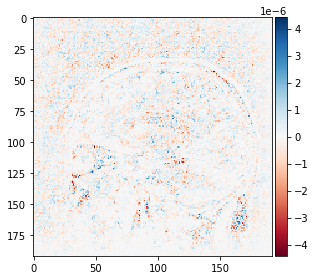

In [23]:
from skimage import io
io.imshow(imgs[5, 100, 0])

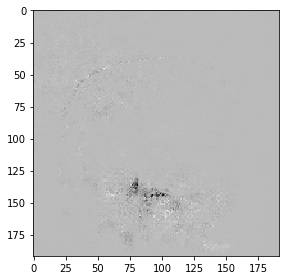

In [36]:
from skimage import io
from skimage import io, transform, img_as_float 
#img_as_float将图像转化为0-1的浮点数
import numpy as np
def int_to_float(image):
#     image = io.imread(f)   #读取图像为整型， [0-255]
#     image = img_as_float(image)  #变为浮点型[0-1]。
    image = (image - image.min()) * (1 / (image.max() - image.min()))  #比例缩放的归一化
#     image = transform.resize(image, (256, 256))  #图像缩放大小
    return image

io.imshow(int_to_float(imgs[5, 110, 0]))

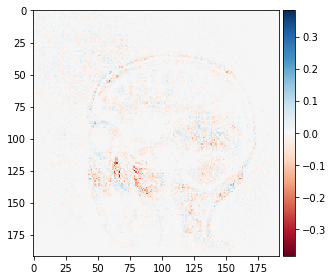

In [42]:
io.imshow(imgs[5, 110, 0] * 1000)

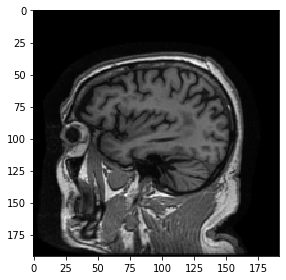

In [30]:
io.imshow(int_to_float(inputs.cpu().detach().numpy()[10, 110, 0]))